## MLB Analysis

這次我們會簡單的幾句話跟大家說明資料科學在美國職棒的運用及影響，以下我們會分析下列幾項：

* 調整物價波動後，大聯盟平均薪資的變化
* 各隊薪資佔聯盟總薪資的佔比
* 飛球革命對於大聯盟的影響
* 整體薪資和戰績的關係
* 薪資組合和戰績的關係


### 首先先匯入會用到的函式庫

In [61]:
library(ggplot2)

In [62]:
data <- read.csv("各年度各隊薪資\\2018.csv")
head(data)

Team,Roster,X25.Man.Payroll,Injured.Reserve,Retained,Buried,Suspended,X2018.Total.Payroll,Rank
Boston Red Sox,36,167955780,18074000,41755860,2180000,0,227398860,1
San Francisco Giants,32,119689218,64341827,21136053,3283000,0,205665348,2
Los Angeles Dodgers,40,160502596,3908850,30541679,5590000,0,199582045,3
Chicago Cubs,37,152092957,37451220,1216894,2725000,3200000,194259933,4
Washington Nationals,35,130197979,8999485,41161720,4481000,0,181382609,5
New York Yankees,38,148010829,22568376,9249414,3130000,0,180098151,6


In [70]:
dataList <- list()
for (i in c(2011:2018))
{
    dataList[[i - 2010]] <- read.csv(paste("各年度各隊薪資\\", toString(i), ".csv", sep=""))
}
dataList

Team,Roster,X25.Man.Payroll,Injured.Reserve,Retained,Buried,Suspended,X2011.Total.Payroll,Rank
New York Yankees,41,212609678,0,950000,0,0,213559678,1
Boston Red Sox,47,164517590,0,8239278,0,0,172553261,2
Philadelphia Phillies,38,169799882,0,168300,0,0,169968182,3
Los Angeles Angels of Anaheim,38,133613959,0,13034600,0,0,146648559,4
New York Mets,38,96163418,0,45668423,0,0,141831841,5
Chicago Cubs,40,124652698,0,14825000,0,0,139477698,6
Chicago White Sox,40,123584951,0,7038798,0,0,130623749,7
San Francisco Giants,39,124882250,0,1100000,0,0,125982250,8
Los Angeles Dodgers,41,98679615,0,19989000,0,0,118668615,9
St. Louis Cardinals,39,113348748,0,2808564,700000,0,116857312,10


In [73]:
inflation <- c(1, 1.017, 1.032255, 1.04051304, 1.047796631, 1.069800361, 1.092266168, 1.113019225)
meanSalary <- c()

for (i in c(1:8))
{
    meanSalary[i] <- mean(dataList[[i]][, "X25.Man.Payroll"]) * inflation[i]
}

salary <- data.frame(meanSal=meanSalary, year=c(2011:2018))

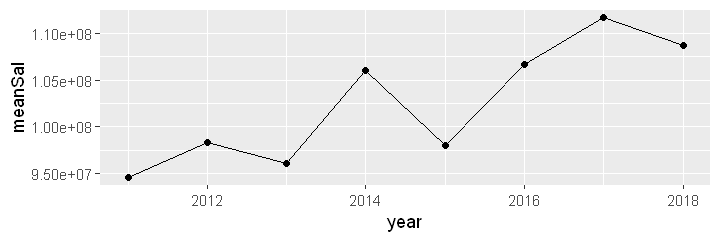

In [74]:
# Create a line plot showing the change in meanSalary over time
ggplot(salary, aes(year, meanSal)) + geom_line() + geom_point()

In [66]:
# pie chart